# Sentiment Analysis with Song Lyrics

In [335]:
#import the corpus csv file
import pandas as pd

AlbumLyricsDF = pd.read_csv("TaylorSwiftCorpus.csv", index_col=0)
AlbumLyricsDF
#AlbumLyricsLIST = list(AlbumLyricsDF["Lyrics"])
#AlbumLyricsLIST
#len(AlbumLyricsLIST)

,Year,Album,Song,Lyrics
0,2006,Taylor-Swift,Mary's-Song-(Oh-My-My-My),"She said, I was seven and you were nine\nI loo..."
1,2006,Taylor-Swift,"Sugar,-We're-Going-Down",Am I more than you bargained for yet?\nI've be...
2,2006,Taylor-Swift,A-Perfectly-Good-Heart,Why would you wanna break a perfectly good hea...
3,2006,Taylor-Swift,Tim-McGraw,He said the way my blue eyes shined\nPut those...
4,2006,Taylor-Swift,I’m-Only-Me-When-I’m-with-You,Friday night beneath the stars\nIn a field beh...
...,...,...,...,...
145,2020,evermore,​tolerate-it,I sit and watch you reading with your head low...
146,2020,evermore,"​no-body,-no-crime",He did it\nHe did it\n\nEste's a friend of min...
147,2020,evermore,​coney-island,Break my soul in two looking for you\nBut you'...
148,2020,evermore,​champagne-problems,You booked the night train for a reason\nSo yo...


## Preprocessing

The incredible thing about `VADER` is that it doesn’t require
- tokenisation
- stemming/lemmatisation
- expanding contraction
You can pretty much plug in any body of text and it will determine the sentiment.

What makes `VADER` so good at analysing social media text is that it is even smart enough to understand
- the valence of non-conventional text, including emojis (i.e. :-( )
- capitalisation (i.e. sad vs SAD)
- extended punctuation (i.e. ? vs ???)

Additionally, VADER removes stop words automatically so there is no need to do so yourself.

Unless you are considering the impact of rhetorical structure on the calculation of sentiment, you don't have to do sentence tokenization either.

In [336]:
#contraction
import TAWP
from TAWP.contractions import CONTRACTION_MAP
import re

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    ## create a regex pattern of all contracted forms
    contractions_pattern = re.compile('({})'.format('|'.join(
        contraction_mapping.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)  # the whole matched contraction

        # if the matched contraction (=keys) exists in the dict,
        # get its corresponding uncontracted form (=values)
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())

        return expanded_contraction

    # find each contraction in the pattern,
    # find it from text,
    # and replace it using the output of
    # expand_match
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


#wrap the above in a function
import re
#wrap it all in one function
def normalize_document(doc):
    #remove line breaks
    doc = re.sub("\n", " ", doc)
    #contraction 
    #doc = expand_contractions(doc)
    #remove lower case and remove special characters\whitespaces
    #doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    #remove numeric
    #doc = doc.split()
    #doc = ' '.join([i for i in doc if not i.isdigit()])
    #remove puncs/symbols
    #doc = ''.join([word for word in doc if unicodedata.category(word)[0] not in ["P", "S"]])
    #remove extra whitespaces at both ends
    doc = doc.strip()
    #doc = doc.lower() #要把 I 轉換成 i

    #tokenize
    #doc = tokenizer.tokenize(doc)

    #remove stopwords
    #doc = ' '.join([word for word in doc if word not in stop_words])
    
    #lemmatize document
    #doc = nlp(doc)
    #doc = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in doc])
    
    #re-create document from filtered tokens
    #doc = ' '.join(tokens)
    return (doc)


#normalize texts
AlbumLyricsLIST = AlbumLyricsDF["Lyrics"]

norm_LyricsLIST = [normalize_document(i) for i in AlbumLyricsLIST]
#norm_LyricsLIST = [" ".join(i.split("\n")) for i in norm_LyricsLIST]
AlbumLyricsDF["Lyrics_Parsed"] = norm_LyricsLIST
AlbumLyricsDF

,Year,Album,Song,Lyrics,Lyrics_Parsed
0,2006,Taylor-Swift,Mary's-Song-(Oh-My-My-My),"She said, I was seven and you were nine\nI loo...","She said, I was seven and you were nine I look..."
1,2006,Taylor-Swift,"Sugar,-We're-Going-Down",Am I more than you bargained for yet?\nI've be...,Am I more than you bargained for yet? I've bee...
2,2006,Taylor-Swift,A-Perfectly-Good-Heart,Why would you wanna break a perfectly good hea...,Why would you wanna break a perfectly good hea...
3,2006,Taylor-Swift,Tim-McGraw,He said the way my blue eyes shined\nPut those...,He said the way my blue eyes shined Put those ...
4,2006,Taylor-Swift,I’m-Only-Me-When-I’m-with-You,Friday night beneath the stars\nIn a field beh...,Friday night beneath the stars In a field behi...
...,...,...,...,...,...
145,2020,evermore,​tolerate-it,I sit and watch you reading with your head low...,I sit and watch you reading with your head low...
146,2020,evermore,"​no-body,-no-crime",He did it\nHe did it\n\nEste's a friend of min...,He did it He did it Este's a friend of mine W...
147,2020,evermore,​coney-island,Break my soul in two looking for you\nBut you'...,Break my soul in two looking for you But you'r...
148,2020,evermore,​champagne-problems,You booked the night train for a reason\nSo yo...,You booked the night train for a reason So you...


## Sentiment Analysis using `Vader`

In [337]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk.data
nltk.download('vader_lexicon')

#import VADER
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/marcwu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [55]:
AlbumLyricsDF["Lyrics_Parsed"][0]

'She said, I was seven and you were nine I looked at you like the stars that shined In the sky, the pretty lights And our daddies used to joke about the two of us Growing up and falling in love and our mamas smiled And rolled their eyes and said, "Oh my, my, my"  Take me back to the house in the backyard tree Said you\'d beat me up, you were bigger than me You never did, you never did Take me back when our world was one block wide I dared you to kiss me and ran when you tried Just two kids, you and I Oh my, my, my, my  Well, I was sixteen when suddenly I wasn\'t that little girl you used to see But your eyes still shined like pretty lights And our daddies used to joke about the two of us They never believed we\'d really fall in love And our mamas smiled and rolled their eyes And said, "Oh my, my, my" Take me back to the creek beds we turned up Two A.M. riding in your truck, and all I need is you next to me Take me back to the time we had our very first fight The slamming of doors inste

In [56]:
sentiment = vader.polarity_scores(AlbumLyricsDF["Lyrics_Parsed"][0])
sentiment

{'neg': 0.028, 'neu': 0.84, 'pos': 0.132, 'compound': 0.9882}

In [57]:
AlbumLyricsDF.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
           dtype='int64', length=150)

In [338]:
#Create lists to store the different scores for each word
negative = []
neutral = []
positive = []
compound = []
#Initialize the model
vader = SentimentIntensityAnalyzer()
#Iterate for each row of lyrics and append the scores
for i in AlbumLyricsDF.index:
    scores = vader.polarity_scores(AlbumLyricsDF['Lyrics_Parsed'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])
#Create 4 columns to the main data frame  for each score
AlbumLyricsDF['Negative_Sentiment'] = negative
AlbumLyricsDF['Neutral_Sentiment'] = neutral
AlbumLyricsDF['Positive_Sentiment'] = positive
AlbumLyricsDF['Normalized_Sentiment'] = compound

In [339]:
AlbumLyricsDF.sort_values('Normalized_Sentiment', ascending = False).head(10)

,Year,Album,Song,Lyrics,Lyrics_Parsed,Negative_Sentiment,Neutral_Sentiment,Positive_Sentiment,Normalized_Sentiment
75,2014,1989,This-Love,Clear blue water\nHigh tide came and brought y...,Clear blue water High tide came and brought yo...,0.059,0.522,0.418,0.9997
80,2014,1989,Welcome-to-New-York,"Walking through a crowd, the village is aglow\...","Walking through a crowd, the village is aglow ...",0.015,0.603,0.381,0.9995
103,2019,Lover,London-Boy,"We can go driving in, on my scooter\nUh, you k...","We can go driving in, on my scooter Uh, you kn...",0.003,0.719,0.278,0.9992
12,2006,Taylor-Swift,Stay-Beautiful,"Corey's eyes are like a jungle\nHe smiles, it'...","Corey's eyes are like a jungle He smiles, it's...",0.009,0.684,0.307,0.9988
97,2017,reputation,Call-It-What-You-Want,My castle crumbled overnight\nI brought a knif...,My castle crumbled overnight I brought a knife...,0.032,0.708,0.261,0.9987
101,2017,reputation,I-Did-Something-Bad,"I never trust a narcissist, but they love me\n...","I never trust a narcissist, but they love me S...",0.090,0.665,0.245,0.9987
23,2008,Fearless-Taylor-s-Version,Fearless-(Taylor's-Version),There's something 'bout the way\nThe street lo...,There's something 'bout the way The street loo...,0.031,0.687,0.282,0.9986
83,2014,1989,Out-of-the-Woods,Looking at it now\nIt all seems so simple\nWe ...,Looking at it now It all seems so simple We we...,0.012,0.814,0.174,0.9986
2,2006,Taylor-Swift,A-Perfectly-Good-Heart,Why would you wanna break a perfectly good hea...,Why would you wanna break a perfectly good hea...,0.006,0.708,0.287,0.9979
61,2012,Red,Everything-Has-Changed,(You good to go?)\n\nAll I knew this morning w...,(You good to go?) All I knew this morning whe...,0.010,0.790,0.200,0.9978


In [340]:
AlbumLyricsDF.sort_values('Normalized_Sentiment', ascending = False).tail(10)

,Year,Album,Song,Lyrics,Lyrics_Parsed,Negative_Sentiment,Neutral_Sentiment,Positive_Sentiment,Normalized_Sentiment
90,2017,reputation,Getaway-Car,"No, nothing good starts in a getaway car\n\nIt...","No, nothing good starts in a getaway car It w...",0.116,0.829,0.054,-0.9831
48,2010,Speak-Now,The-Story-of-Us,"I used to think one day, we'd tell the story o...","I used to think one day, we'd tell the story o...",0.173,0.694,0.133,-0.9838
119,2020,folklore,​mad-woman,What did you think I'd say to that?\nDoes a sc...,What did you think I'd say to that? Does a sco...,0.222,0.654,0.123,-0.9862
110,2019,Lover,Afterglow,"I blew things out of proportion, now you're bl...","I blew things out of proportion, now you're bl...",0.181,0.717,0.103,-0.9884
144,2020,evermore,​evermore,Gray November\nI've been down since July\nMoti...,Gray November I've been down since July Motion...,0.178,0.772,0.050,-0.9944
82,2014,1989,Bad-Blood,"’Cause baby, now we've got bad blood\nYou know...","’Cause baby, now we've got bad blood You know ...",0.202,0.691,0.108,-0.9953
11,2006,Taylor-Swift,Picture-to-Burn,"State the obvious, I didn't get my perfect fan...","State the obvious, I didn't get my perfect fan...",0.314,0.619,0.067,-0.9980
105,2019,Lover,Miss-Americana-&-The-Heartbreak-Prince,"You know I adore you, I'm crazier for you\nTha...","You know I adore you, I'm crazier for you Than...",0.255,0.667,0.077,-0.9989
69,2012,Red,I-Knew-You-Were-Trouble.,"Once upon a time, a few mistakes ago\nI was in...","Once upon a time, a few mistakes ago I was in ...",0.310,0.670,0.021,-0.9990
78,2014,1989,Shake-It-Off,I stay out too late\nGot nothing in my brain\n...,I stay out too late Got nothing in my brain Th...,0.380,0.535,0.085,-0.9995


In [341]:
#Convert the sentiment scores to labels
Sentiment = []
for i in AlbumLyricsDF['Normalized_Sentiment']:
    if i >= 0.5:
        Sentiment.append('Positive')
    elif i < 0.5 and i > -0.5:
        Sentiment.append('Neutral')
    elif i < -0.5:
        Sentiment.append('Negative')
    else:
        Sentiment.append('Non')

AlbumLyricsDF['Sentiment_Label'] = Sentiment
AlbumLyricsDF

,Year,Album,Song,Lyrics,Lyrics_Parsed,Negative_Sentiment,Neutral_Sentiment,Positive_Sentiment,Normalized_Sentiment,Sentiment_Label
0,2006,Taylor-Swift,Mary's-Song-(Oh-My-My-My),"She said, I was seven and you were nine\nI loo...","She said, I was seven and you were nine I look...",0.028,0.840,0.132,0.9882,Positive
1,2006,Taylor-Swift,"Sugar,-We're-Going-Down",Am I more than you bargained for yet?\nI've be...,Am I more than you bargained for yet? I've bee...,0.079,0.835,0.086,-0.5541,Negative
2,2006,Taylor-Swift,A-Perfectly-Good-Heart,Why would you wanna break a perfectly good hea...,Why would you wanna break a perfectly good hea...,0.006,0.708,0.287,0.9979,Positive
3,2006,Taylor-Swift,Tim-McGraw,He said the way my blue eyes shined\nPut those...,He said the way my blue eyes shined Put those ...,0.032,0.810,0.158,0.9935,Positive
4,2006,Taylor-Swift,I’m-Only-Me-When-I’m-with-You,Friday night beneath the stars\nIn a field beh...,Friday night beneath the stars In a field behi...,0.072,0.813,0.115,0.8705,Positive
...,...,...,...,...,...,...,...,...,...,...
145,2020,evermore,​tolerate-it,I sit and watch you reading with your head low...,I sit and watch you reading with your head low...,0.073,0.776,0.151,0.9759,Positive
146,2020,evermore,"​no-body,-no-crime",He did it\nHe did it\n\nEste's a friend of min...,He did it He did it Este's a friend of mine W...,0.169,0.701,0.130,-0.9799,Negative
147,2020,evermore,​coney-island,Break my soul in two looking for you\nBut you'...,Break my soul in two looking for you But you'r...,0.102,0.789,0.110,0.8550,Positive
148,2020,evermore,​champagne-problems,You booked the night train for a reason\nSo yo...,You booked the night train for a reason So you...,0.152,0.708,0.141,-0.6832,Negative


### Visualization

#### Scatterplot

##### Method 1 using `matplotlib`

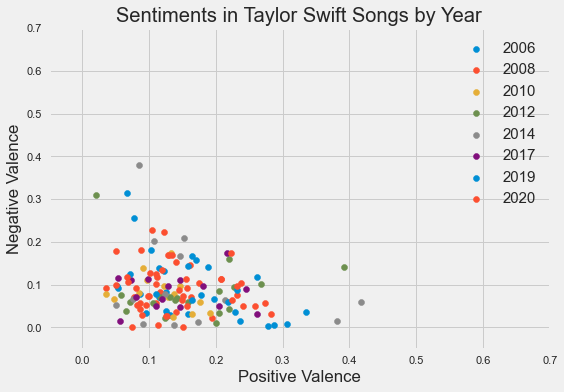

In [342]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn') 
plt.style.use('fivethirtyeight')

for name, group in AlbumLyricsDF.groupby('Year'):
    plt.scatter(group['Positive_Sentiment'],group['Negative_Sentiment'],label=name)
    plt.legend(fontsize=15)
plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Sentiments in Taylor Swift Songs by Year")
plt.xlabel('Positive Valence')
plt.ylabel('Negative Valence')
plt.show()

##### Method 2 using `plotly`

In [346]:
import plotly.express as px

fig = px.scatter(AlbumLyricsDF, x="Year", y="Normalized_Sentiment", color="Song",
                 size='Positive_Sentiment', hover_data=['Negative_Sentiment'],
                 color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [279]:
df = px.data.iris()
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


#### Histogram (normalized by 100)

##### Method 1 using `matplotlib`
NOTE: The color options are quite limited in `matplotlib`.

<AxesSubplot:xlabel='Year'>

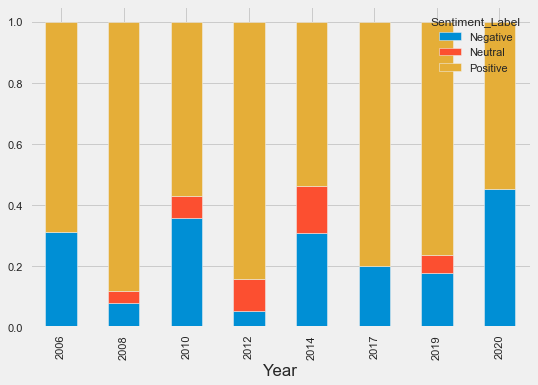

In [275]:
AlbumLyricsDF.groupby('Year')['Sentiment_Label'].value_counts(normalize=True).unstack('Sentiment_Label').plot.bar(stacked=True)


##### Method 2 using `plotly`

NOTE: Sorting the bars by a particular order isn't possible right now - it's only possible to sort by the total values. Of course, you can always sort your data before plotting it if you need more customization.

In [344]:
FreqTable = AlbumLyricsDF[['Year','Sentiment_Label']].value_counts().rename_axis(['Year','SentimentLabel']).reset_index(name='counts')
FreqTable

#Sort the album diachronically
#album_order = ["Taylor-Swift","Fearless-Taylor-s-Version","Speak-Now","Red","1989","reputation","Lover","folklore","evermore"]
#FreqTable['Album'] = pd.Categorical(FreqTable.Album, categories=album_order, ordered=True)
#Sort the order in SentimentLabel
FreqTableSorted = FreqTable.sort_values(['Year','SentimentLabel'], ascending = [True, False])
FreqTableSorted


,Year,SentimentLabel,counts
6,2006,Positive,11
9,2006,Negative,5
0,2008,Positive,22
20,2008,Neutral,1
15,2008,Negative,2
7,2010,Positive,8
19,2010,Neutral,1
10,2010,Negative,5
2,2012,Positive,16
16,2012,Neutral,2


In [345]:
import plotly.express as px

fig = px.histogram(x=FreqTableSorted.Year, y=FreqTableSorted.counts, color=FreqTableSorted.SentimentLabel,
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   title="Sentiments in Taylor Swift Songs by Year",
                   labels={'x':'Years','y':'Sentiment'},
                   barnorm='percent',
                   height=600, width=800)

fig.update_xaxes(type="category") #this is necessary if the variable for x axis if numeric, such as years
fig.show()

## Sentiment Analysis using `TextBlob`

In [296]:
# Importing TextBlob
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [319]:
# Preparing an input sentence
sentence = AlbumLyricsDF.loc[AlbumLyricsDF['Song'] == "Shake-It-Off", 'Lyrics_Parsed'].item()
sentence

"I stay out too late Got nothing in my brain That's what people say, mmm-mmm That's what people say, mmm-mmm I go on too many dates But I can't make them stay At least that's what people say, mmm-mmm That's what people say, mmm-mmm  But I keep cruisin' Can't stop, won't stop movin' It's like I got this music in my mind Sayin' it's gonna be alright  'Cause the players gonna play, play, play, play, play And the haters gonna hate, hate, hate, hate, hate Baby, I'm just gonna shake, shake, shake, shake, shake I shake it off, I shake it off Heartbreakers gonna break, break, break, break, break And the fakers gonna fake, fake, fake, fake, fake Baby, I'm just gonna shake, shake, shake, shake, shake I shake it off, I shake it off I never miss a beat I'm lightning on my feet And that's what they don’t see, mmm-mmm That's what they don’t see, mmm-mmm I'm dancin' on my own (Dancin' on my own) I make the moves up as I go (Moves up as I go) And that's what they don't know, mmm-mmm That’s what they d

In [317]:
classifier = NaiveBayesAnalyzer()
# Applying the NaiveBayesAnalyzer
blob_object = TextBlob(sentence, analyzer=classifier)
# Running sentiment analysis
analysis = blob_object.sentiment
print(analysis)

Sentiment(classification='neg', p_pos=0.12591259620177453, p_neg=0.8740874037982165)


In [321]:
from flair.models import TextClassifier
from flair.data import Sentence

sentence = AlbumLyricsDF.loc[AlbumLyricsDF['Song'] == "Shake-It-Off", 'Lyrics_Parsed'].item()

classifier = TextClassifier.load('en-sentiment')
s = Sentence(sentence)
classifier.predict(s)



AttributeError: module 'flair' has no attribute 'nn'

In [314]:
pip install flair

     |████████████████████████████████| 284 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 788 kB 11.3 MB/s eta 0:00:01     |███████████████████████▊        | 583 kB 11.3 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 24.2 MB 26.7 MB/s eta 0:00:01
     |████████████████████████████████| 108.8 MB 11.8 MB/s eta 0:00:01  |██▌                             | 8.5 MB 8.2 MB/s eta 0:00:13     |███▌                            | 12.0 MB 3.6 MB/s eta 0:00:27     |█████████▉                      | 33.6 MB 9.6 MB/s eta 0:00:08     |███████████▋                    | 39.6 MB 7.7 MB/s eta 0:00:09     |██████████████▍                 | 49.0 MB 11.1 MB/s eta 0:00:06     |█████████████████               | 58.1 MB 19.0 MB/s eta 0:00:03     |██████████████████████████████▋ | 104.2 MB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 13.9 

  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9693 sha256=8ededd9ceeb562d12b55bf49b2eba8a8155fdb0daa99a563324274922b84325c
  Stored in directory: /Users/marcwu/Library/Caches/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116678 sha256=79f3b8850c4dfc62661250745fe7135245fc07a6ea7321a746ee981c548ecbb4
  Stored in directory: /Users/marcwu/Library/Caches/pip/wheels/26/70/6a/1c79e59951a41b4045497da187b2724f5659ca64033cf4548e
  Created wheel for overrides: filename=overrides-3.1.0-py3-none-any.whl size=10175 sha256=5ee62050139fd389e6a4162b544ccde2355473544e5ea71aceac78fb8d6288ab
  Stored in directory: /Users/marcwu/Library/Caches/pip/wheels/3a/0d/38/01a9bc6e20dcfaf0a6a7b552d03137558ba1c38aea47644682
  Created wheel for segtok: filename=segtok-1.5.10-py3-none-any.whl size=25018 sha256=53500f50abb7d5db07beb39cb42c38d7f12a6696c1d4133210b627feb8571d60
  Stored in directory: /Users